In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
movies=pd.read_csv("Dataset for Code Wars.csv")

In [3]:
movies.head(10)


,Rank,Released,Movie,Worldwide\r\nBox Office,Domestic\r\nBox Office,International\r\nBox Office
0,1,2009.0,Avatar,"$2,923,706,026","$785,221,649","$2,138,484,377"
1,2,2019.0,Avengers: Endgame,"$2,794,731,755","$858,373,000","$1,936,358,755"
2,3,2022.0,Avatar: The Way of Water,"$2,318,552,513","$683,875,614","$1,634,676,899"
3,4,2018.0,Avengers: Infinity War,"$2,048,359,754","$678,815,482","$1,369,544,272"
4,5,2021.0,Spider-Man: No Way Home,"$1,910,048,245","$814,115,070","$1,095,933,175"
5,6,2015.0,Jurassic World,"$1,669,963,641","$652,306,625","$1,017,657,016"
6,7,2012.0,The Avengers,"$1,515,100,211","$623,357,910","$891,742,301"
7,8,2015.0,Furious 7,"$1,514,553,486","$353,007,020","$1,161,546,466"
8,9,2022.0,Top Gun: Maverick,"$1,481,369,482","$718,732,821","$762,636,661"
9,10,2015.0,Avengers: Age of Ultron,"$1,395,316,979","$459,005,868","$936,311,111"


# remove $

In [4]:
movies['International\r\nBox Office'] = movies['International\r\nBox Office'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))


#  Find out TOP 10 HIGHEST GROSSING MOVIES (Graph)

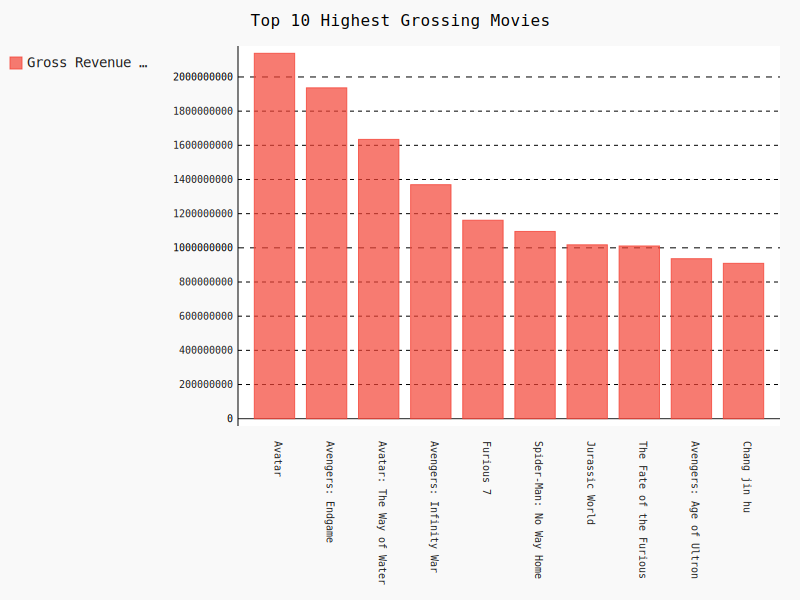

In [5]:
import pygal
from IPython.display import SVG, display

movies.sort_values(by='International\r\nBox Office', ascending=False, inplace=True)
top_movies = movies.head(10)

bar_chart = pygal.Bar(width=800, height=600, x_label_rotation=90)
bar_chart.title = 'Top 10 Highest Grossing Movies'
bar_chart.x_labels = top_movies['Movie']
bar_chart.add('Gross Revenue (in billions)', top_movies['International\r\nBox Office'])

# Render the chart to an SVG file or display it directly
bar_chart.render_to_file('top_10_highest_grossing_movies.svg')
svg = bar_chart.render()
display(SVG(svg))

 # Find out LOWEST 10 GROSSING MOVIES (Graph)


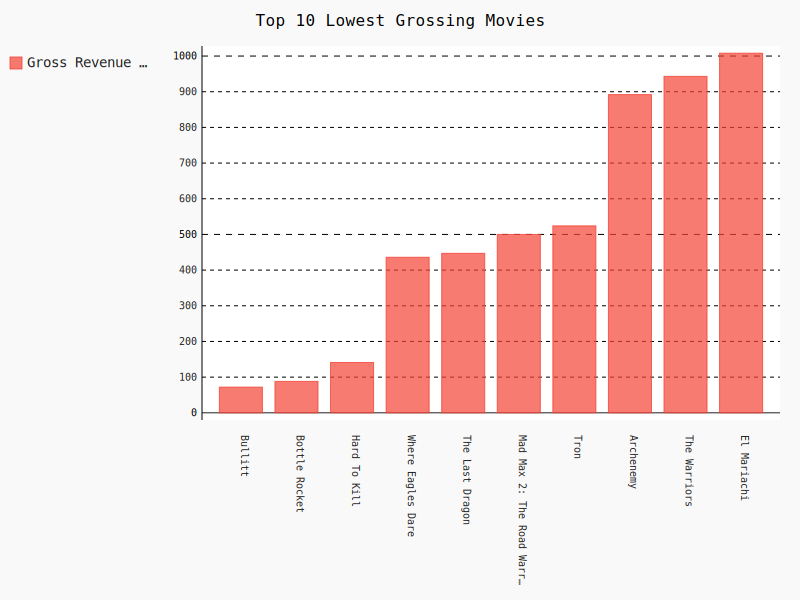

In [6]:
import pygal

movies.sort_values(by='International\r\nBox Office', ascending=True, inplace=True)
top_movies = movies.head(10)

bar_chart = pygal.Bar(width=800, height=600, x_label_rotation=90)
bar_chart.title = 'Top 10 Lowest Grossing Movies'
bar_chart.x_labels = top_movies['Movie']
bar_chart.add('Gross Revenue (in billions)', top_movies['International\r\nBox Office'])
bar_chart.render_to_file('top_10_lowest_grossing_movies.svg')
display(SVG('top_10_lowest_grossing_movies.svg'))

# # Find out TOP 10 HIGHEST GROSSING MOVIES INTERNATIOANLLY (Year-wise Distribution from 2012 to 2022)

In [7]:
filtered_movies = movies[(movies['Released'] >= 2012) & (movies['Released'] <= 2022)]


In [8]:
grouped_movies = filtered_movies.groupby('Released').apply(lambda x: x.nlargest(10, 'International\r\nBox Office')).reset_index(drop=True)

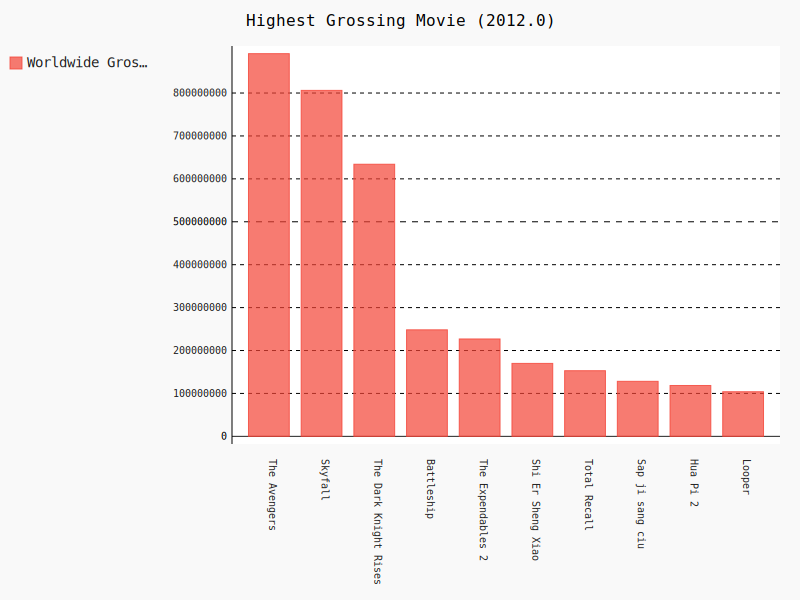

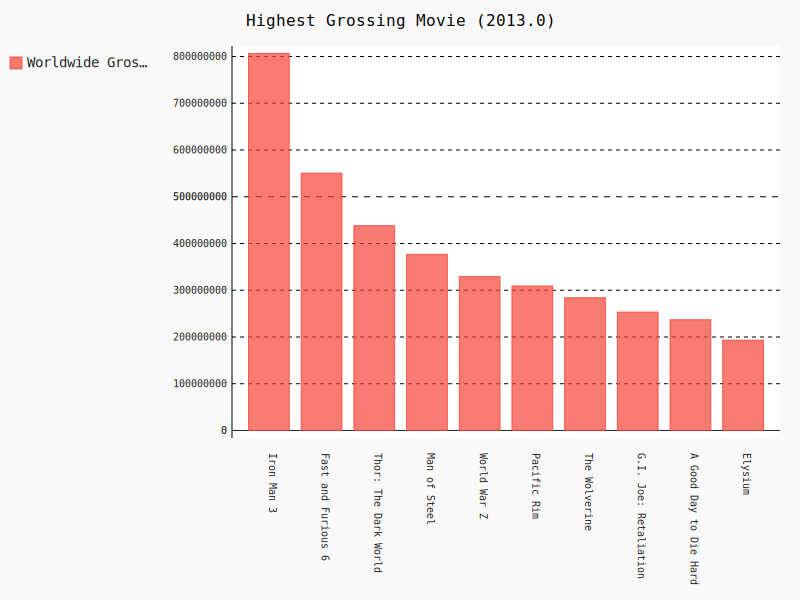

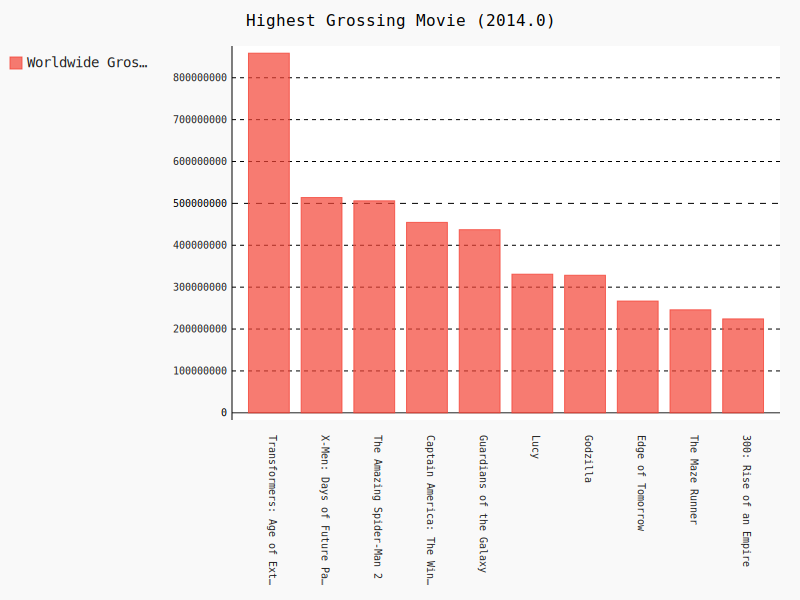

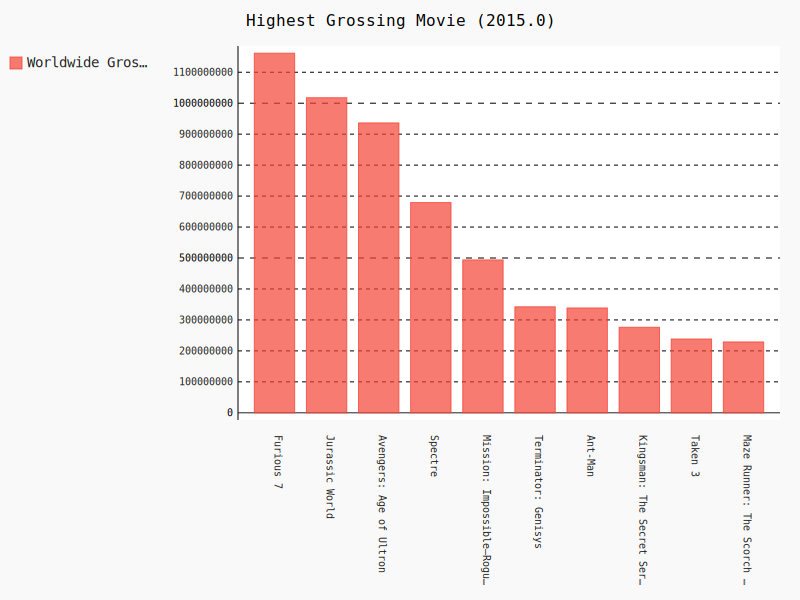

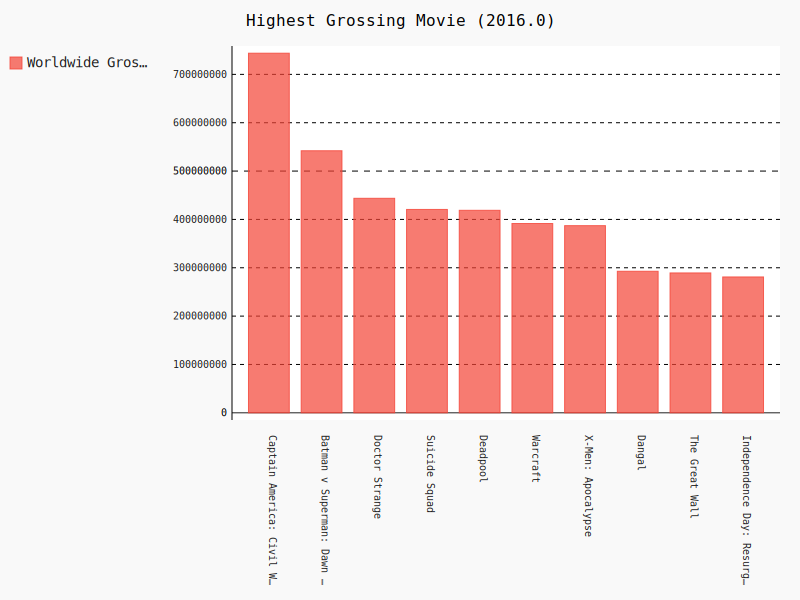

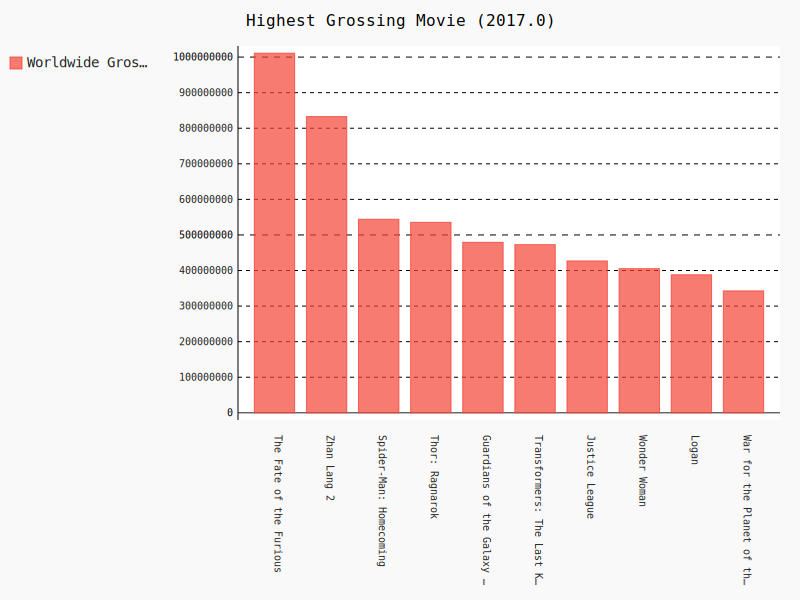

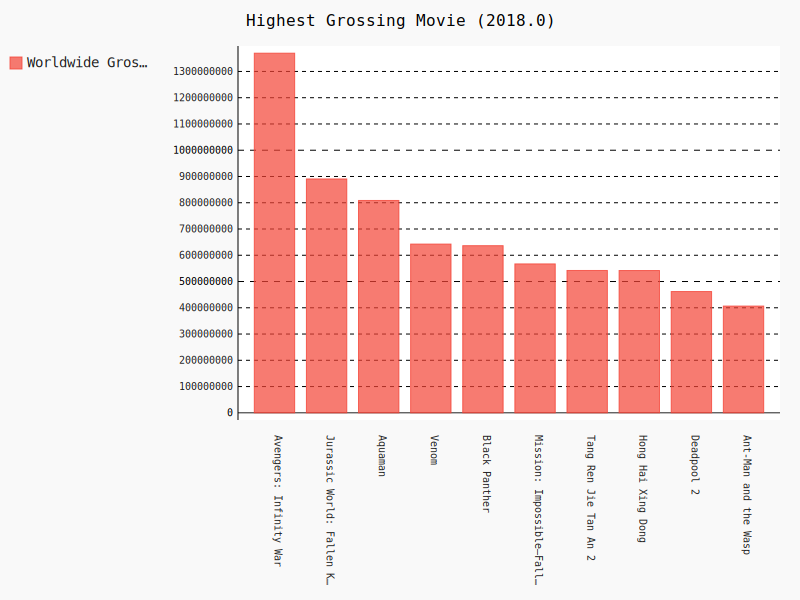

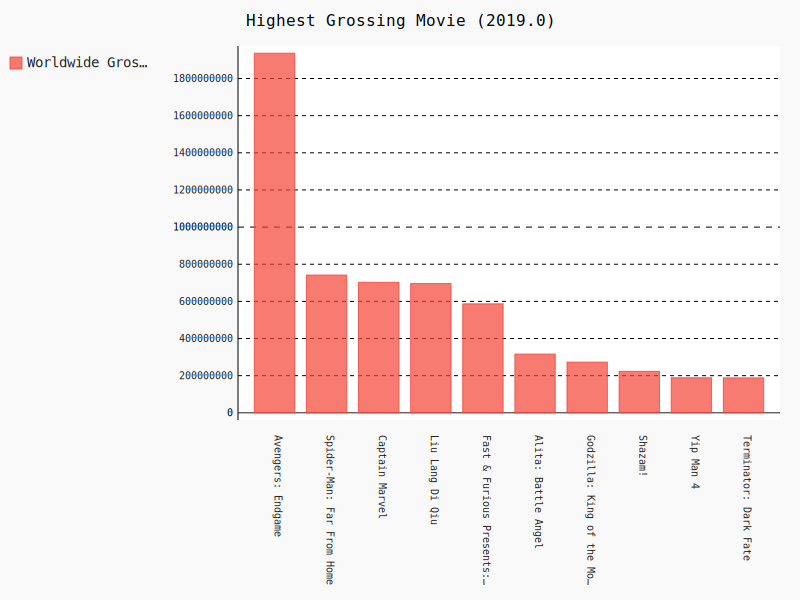

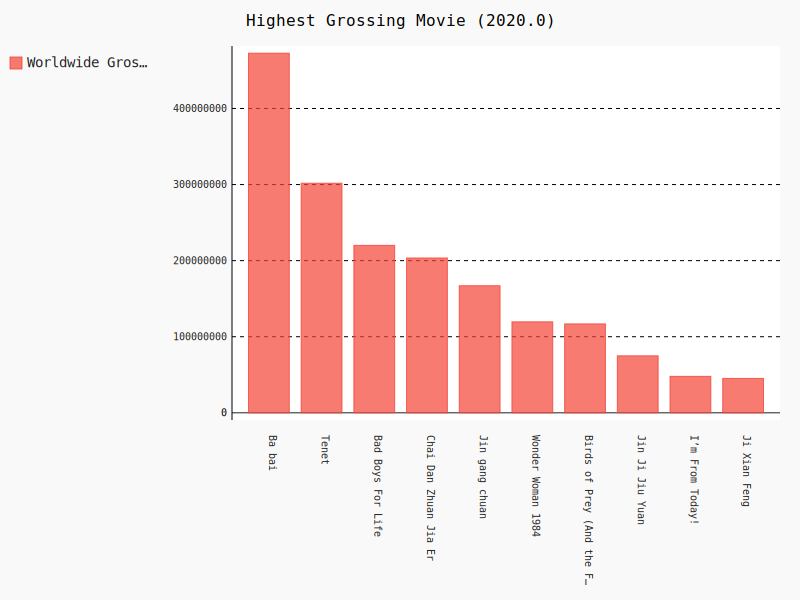

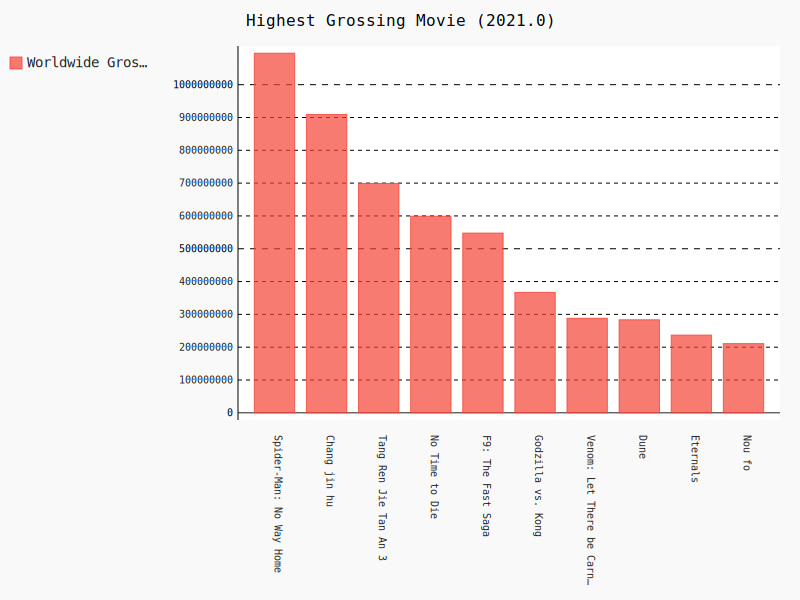

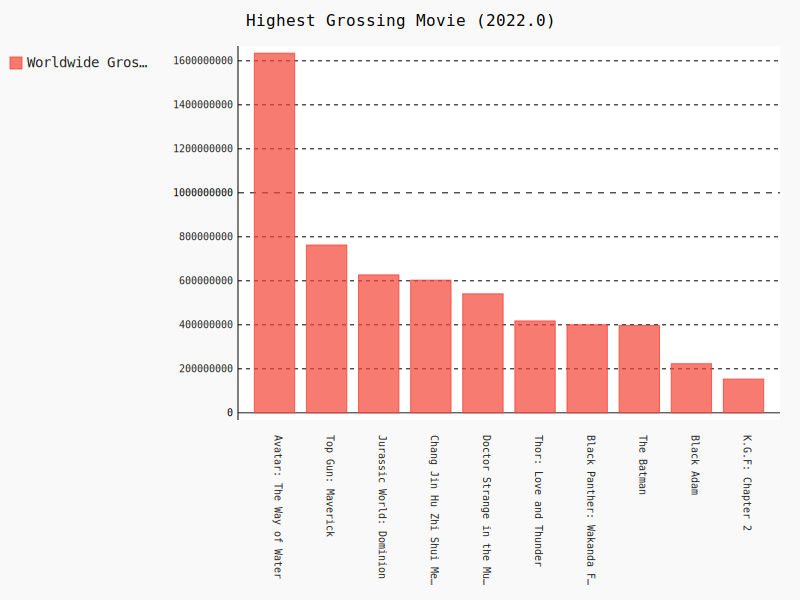

In [9]:
import pygal
from IPython.display import SVG, display

for year, data in grouped_movies.groupby('Released'):
    sorted_data = data.sort_values('International\r\nBox Office', ascending=False)
    
    # Create a new bar chart
    bar_chart = pygal.Bar(width=800, height=600, x_label_rotation=90)
    bar_chart.title = f'Highest Grossing Movie ({year})'
    bar_chart.x_labels = sorted_data['Movie']
    bar_chart.add('Worldwide Gross (in billions)', sorted_data['International\r\nBox Office'])
    
    # Render the chart and display it
    svg = bar_chart.render()
    display(SVG(svg))